In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key
from citipy import citipy
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.66207108948552 159.10967624422904
-85.21170754305547 152.65173938767663
-69.3239603587514 142.41786131483758
-9.924577276329103 25.01594325425367
-29.597168460092888 -93.4748732701279
-71.61609980654464 -123.10336674181079
-23.75330236912194 5.327014906666534
-52.97787963235638 175.70870203279424
57.55331219734592 137.36517448326094
-24.517833302233186 51.7714594788861
-43.05093412866038 -127.10016457930111
44.4792390788042 -113.63162206195268
39.22874592670536 63.50781387582634
5.9706819335647054 -24.252253264686033
47.84739081866539 20.768187928790184
-17.169219328398725 -41.04305598226986
82.18961639317556 -107.77244426466898
41.81372487507508 89.97115349925025
-67.04756325137835 -103.13633270765727
79.32662568169067 -135.33935975396497
-14.357789350103019 -12.81935608513794
-18.676396777083298 -103.32361117445495
49.42518869574937 -27.540605602966792
17.622280564213057 116.32704933780599
32.93435992866172 55.50737576342817
58.45370759533202 -16.011182845984365
6.237816596821077 

In [2]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

NameError: name 'coordinates' is not defined

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 13 | bluff
Processing Record 3 of Set 13 | hobart
Processing Record 4 of Set 13 | bukama
Processing Record 5 of Set 13 | lebu
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | henties bay
Processing Record 8 of Set 13 | dunedin
Processing Record 9 of Set 13 | ayan
Processing Record 10 of Set 13 | farafangana
Processing Record 11 of Set 13 | hailey
Processing Record 12 of Set 13 | farap
Processing Record 13 of Set 13 | sao filipe
Processing Record 14 of Set 13 | mezokeresztes
Processing Record 15 of Set 13 | aguas formosas
Processing Record 16 of Set 13 | yellowknife
Processing Record 17 of Set 13 | urumqi
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | tuktoyaktuk
Processing Record 20 of Set 13 | georgetown
Processing Record 21 of Set 13 | puerto ayora
Processing Record 22 of Set 13 | lagoa


Processing Record 33 of Set 16 | westport
Processing Record 34 of Set 16 | nanortalik
Processing Record 35 of Set 16 | port blair
Processing Record 36 of Set 16 | alyangula
Processing Record 37 of Set 16 | yvetot
Processing Record 38 of Set 16 | tapaua
City not found. Skipping...
Processing Record 39 of Set 16 | abha
Processing Record 40 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 16 | skjervoy
Processing Record 42 of Set 16 | sur
Processing Record 43 of Set 16 | tawkar
City not found. Skipping...
Processing Record 44 of Set 16 | mangai
Processing Record 45 of Set 16 | abonnema
Processing Record 46 of Set 16 | amberley
Processing Record 47 of Set 16 | aklavik
Processing Record 48 of Set 16 | penzance
Processing Record 49 of Set 16 | ixtapa
Processing Record 50 of Set 16 | leningradskiy
Processing Record 1 of Set 17 | port hardy
Processing Record 2 of Set 17 | trincomalee
Processing Record 3 of Set 17 | esperance
Processing Record 4 of Set 17 | lloyd

Processing Record 22 of Set 20 | saint-augustin
Processing Record 23 of Set 20 | fairbanks
Processing Record 24 of Set 20 | inverbervie
Processing Record 25 of Set 20 | meyungs
City not found. Skipping...
Processing Record 26 of Set 20 | longyearbyen
Processing Record 27 of Set 20 | vestmanna
Processing Record 28 of Set 20 | poum
Processing Record 29 of Set 20 | kharp
Processing Record 30 of Set 20 | mutum
Processing Record 31 of Set 20 | liverpool
Processing Record 32 of Set 20 | sug-aksy
City not found. Skipping...
Processing Record 33 of Set 20 | kropotkin
Processing Record 34 of Set 20 | dudinka
Processing Record 35 of Set 20 | aksu
Processing Record 36 of Set 20 | camacha
Processing Record 37 of Set 20 | cayambe
Processing Record 38 of Set 20 | marysville
Processing Record 39 of Set 20 | cayenne
Processing Record 40 of Set 20 | marcona
City not found. Skipping...
Processing Record 41 of Set 20 | samusu
City not found. Skipping...
Processing Record 42 of Set 20 | pevek
Processing R

Processing Record 7 of Set 24 | ipira
Processing Record 8 of Set 24 | fortuna
Processing Record 9 of Set 24 | vila
Processing Record 10 of Set 24 | kamyshin
Processing Record 11 of Set 24 | soderhamn
Processing Record 12 of Set 24 | punto fijo
Processing Record 13 of Set 24 | izumo
Processing Record 14 of Set 24 | hambantota
Processing Record 15 of Set 24 | channel-port aux basques
Processing Record 16 of Set 24 | high level
Processing Record 17 of Set 24 | buariki
City not found. Skipping...
Processing Record 18 of Set 24 | leeton
Processing Record 19 of Set 24 | nizhniy chir
Processing Record 20 of Set 24 | chickasha
Processing Record 21 of Set 24 | jilmah
City not found. Skipping...
Processing Record 22 of Set 24 | atambua
Processing Record 23 of Set 24 | flin flon
Processing Record 24 of Set 24 | minuri
Processing Record 25 of Set 24 | mao
Processing Record 26 of Set 24 | grand river south east
City not found. Skipping...
Processing Record 27 of Set 24 | beni
Processing Record 28 o

In [8]:
len(city_data)

565

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [10]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

In [11]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petropavlovsk-Kamchatskiy,RU,2022-09-20 17:40:13,53.0452,158.6483,48.79,57,40,11.18
1,Bluff,NZ,2022-09-20 17:40:14,-46.6000,168.3333,46.80,84,88,4.52
2,Hobart,AU,2022-09-20 17:37:50,-42.8794,147.3294,53.46,66,100,6.91
3,Bukama,CD,2022-09-20 17:40:14,-9.2000,25.8500,84.27,48,70,1.25
4,Lebu,CL,2022-09-20 17:40:14,-37.6167,-73.6500,49.80,68,44,7.52


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/20/22'

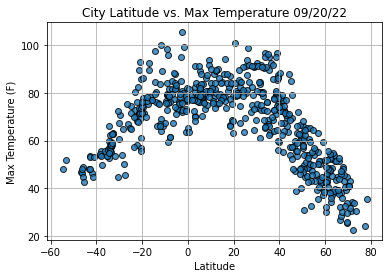

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

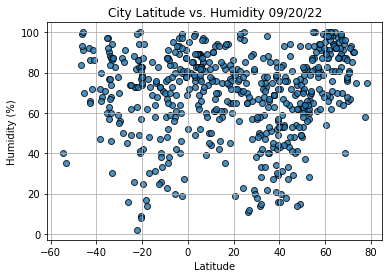

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

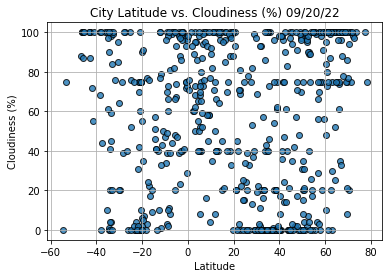

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

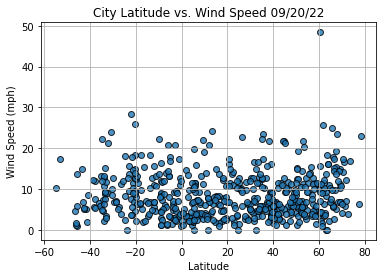

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]

In [37]:
index13

City                Mezokeresztes
Country                        HU
Date          2022-09-20 17:40:17
Lat                       47.8333
Lng                          20.7
Max Temp                    53.58
Humidity                       74
Cloudiness                     91
Wind Speed                   3.89
Name: 13, dtype: object

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petropavlovsk-Kamchatskiy,RU,2022-09-20 17:40:13,53.0452,158.6483,48.79,57,40,11.18
8,Ayan,RU,2022-09-20 17:40:15,56.4500,138.1667,39.04,61,4,15.37
10,Hailey,US,2022-09-20 17:40:16,43.5196,-114.3153,70.81,33,0,11.50
11,Farap,TM,2022-09-20 17:40:16,39.1704,63.6116,75.20,29,0,9.22
12,Sao Filipe,CV,2022-09-20 17:40:16,14.8961,-24.4956,78.89,75,45,8.37


In [39]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

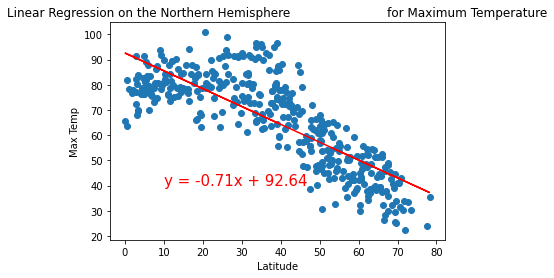

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

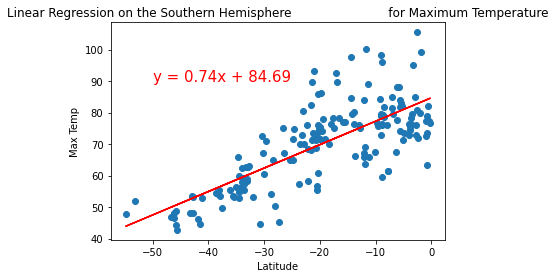

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

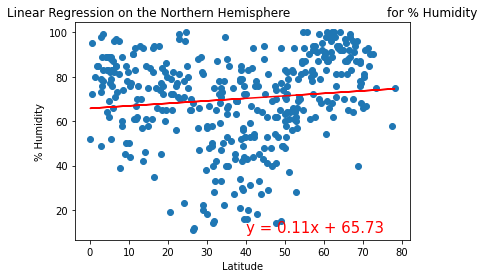

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

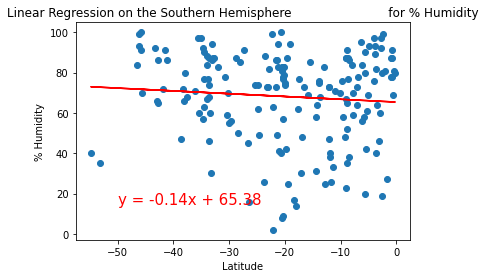

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

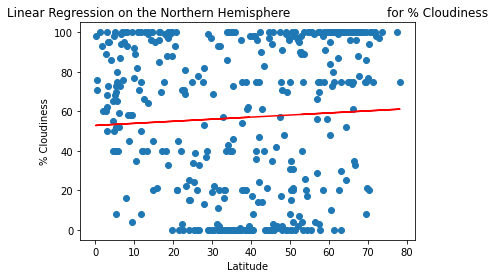

In [44]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

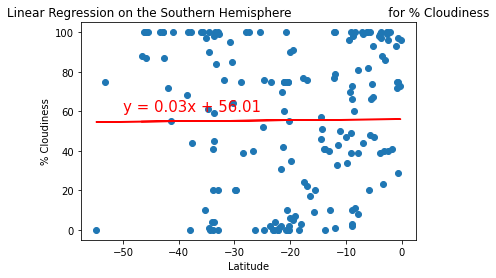

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

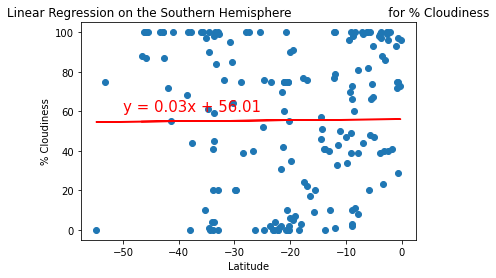

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

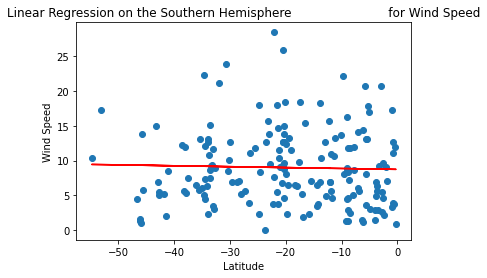

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))